In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [8]:
df.shape

(41188, 21)

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
X = df.drop(columns='y')
y = df['y']
X.shape, y.shape

((41188, 20), (41188,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initial Baseline Model
- Naive Baseline

In [12]:
y_train = y_train.replace({'no':0,'yes':1})
y_test = y_test.replace({'no':0,'yes':1})

In [13]:
features = ['age', 'previous']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train[features], y_train)

y_test_pred = logreg.predict(X_test[features])
y_train_pred_proba = logreg.predict_proba(X_train[features])[:,1]
y_test_pred_proba = logreg.predict_proba(X_test[features])[:,1]


score = logreg.score(X_train[features], y_train)
print('Train Accuracy Score:', score)
score = logreg.score(X_test[features], y_test)
print('Test Accuracy Score:', score)
print('Test F1 Score:', f1_score(y_test, y_test_pred))
print('Test ROC AUC Score:', roc_auc_score(y_test, y_test_pred_proba))

Train Accuracy Score: 0.8884066767830046
Test Accuracy Score: 0.8896576839038601
Test F1 Score: 0.0752797558494405
Test ROC AUC Score: 0.5881230394122365


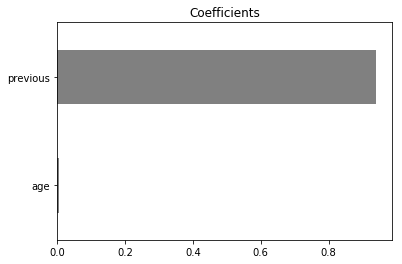

In [14]:
plt.title('Coefficients')
coefficients = logreg.coef_[0]
feature_names = X_train[features].columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

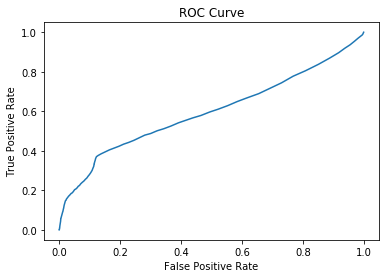

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Exploratory Analysis

In [16]:
X_train.isnull().sum().sum()

0

In [17]:
y_train.value_counts(normalize=True)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [18]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [19]:
X_train.describe(include='number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719,0.080470,93.575881,-40.508489,3.618395,5166.899651
std,10.403636,258.975917,2.752326,187.951096,0.499025,1.571266,0.579209,4.628223,1.735896,72.434812
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
X_train.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416


In [21]:
X_train['month'].value_counts()

may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64

## Approach to feature engineering

In [22]:
X_train.shape

(32950, 20)

In [23]:
import numpy as np

np.where( [(X_train['pdays']>7) & (X_train['pdays'] < 100)], 1, 0)

array([[0, 0, 0, ..., 0, 0, 0]])

In [24]:
def prepare_features(X):
    X = X.copy()
    X['pdays<=7'] = np.where( X['pdays'] <= 7, 1, 0)
    X['7<pdays<=14'] = np.where( (X['pdays'] < 14) & (X['pdays'] > 7), 1, 0)
    X['14<pdays<=21'] = np.where( (X['pdays'] <= 21) & (X['pdays'] > 14), 1, 0)
    X['21<pdays<=28'] = np.where( (X['pdays'] <= 28) & (X['pdays'] > 21), 1, 0)
    X['pdays=na'] = np.where( X['pdays'] > 28, 1, 0)
    X = X.drop(columns=['duration','pdays'], axis=1)
    return X

In [25]:
X_train = prepare_features(X_train)
X_test = prepare_features(X_test)
X_train.shape, X_test.shape

((32950, 23), (8238, 23))

# Pipeline

In [26]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [27]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pdays<=7            int64
7<pdays<=14         int64
14<pdays<=21        int64
21<pdays<=28        int64
pdays=na            int64
dtype: object

In [28]:
import category_encoders as ce

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [29]:
cat_features = X_train.select_dtypes('object').columns.tolist()

scale_features = X_train.select_dtypes('float').columns.tolist()
scale_features.append( 'campaign' )
scale_features.append( 'previous' )

In [65]:
one_hot_processing = make_pipeline(
    ce.OrdinalEncoder()
)
standard_processing = make_pipeline(
    StandardScaler(),
    SimpleImputer(strategy='mean')
)

preprocess = make_column_transformer(
    (one_hot_processing, cat_features),
    (standard_processing, scale_features)
)

In [66]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    preprocess,
    LogisticRegression(solver='lbfgs', class_weight=None, max_iter=1000)
)

In [67]:
from sklearn.model_selection import cross_validate
scoring = ['f1', 'roc_auc', 'accuracy']
scores = cross_validate(model, X_train, y_train, return_train_score=True, scoring=scoring, cv=5)
scores = pd.DataFrame(scores)
scores.describe()

,fit_time,score_time,test_f1,train_f1,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.436212,0.096869,0.299103,0.298324,0.775259,0.777351,0.894628,0.894765
std,0.031221,0.011332,0.006548,0.007603,0.013539,0.002404,0.001368,0.001035
min,0.407439,0.090200,0.288911,0.288136,0.760773,0.774719,0.892700,0.893054
25%,0.415910,0.090521,0.296296,0.294721,0.762617,0.775346,0.893930,0.894769
50%,0.431622,0.090628,0.302115,0.299141,0.778110,0.777087,0.894825,0.894837
75%,0.438573,0.096388,0.303448,0.300966,0.781885,0.779577,0.895464,0.895490
max,0.487518,0.116609,0.304743,0.308657,0.792909,0.780024,0.896222,0.895675


In [68]:
def run_log_reg(X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    print('Test Accuracy Score:', score)
    print('Test F1 Score:', f1_score(y_test, y_pred))
    print('Test ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
    
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                           columns=['Predicted Negative', 'Predicted Positive'],
                           index=['Actual Negative','Actual Positive'])
    print(conf_mat)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('Test ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

Test Accuracy Score: 0.8958485069191552
Test F1 Score: 0.29324546952224056
Test ROC AUC Score: 0.7837319861785933
                 Predicted Negative  Predicted Positive
Actual Negative                7202                 108
Actual Positive                 750                 178


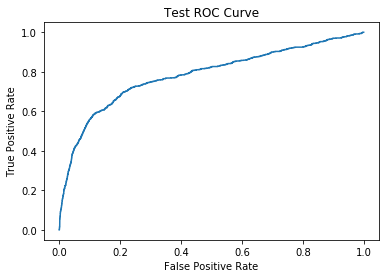

In [69]:
run_log_reg(X_train, X_test, y_train, y_test)

# Explore RandomForests and XGBoost

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [81]:
def run_trees(tree, X_train, X_test, y_train, y_test):
    X_train = preprocess.fit_transform(X_train, y_train)
    X_test = preprocess.transform(X_test)
    
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    y_pred = tree.predict(X_test)
    y_pred_proba = tree.predict_proba(X_test)[:,1]
    
    name = tree.__class__.__name__
    print(name)
    print('Test Accuracy Score:', score)
    print('Test F1 Score:', f1_score(y_test, y_pred))
    print('Test ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))

    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                           columns=['Predicted Negative', 'Predicted Positive'],
                           index=['Actual Negative','Actual Positive'])
    print(conf_mat)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('Test ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [84]:
def forest(max_depth=4, n_estimators=100, X_train=X_train, 
           X_test=X_test, y_train=y_train, y_test=y_test):
    models = [DecisionTreeClassifier(max_depth=max_depth),
              RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators),
              XGBClassifier(n_estimators=n_estimators)]
    
    for model in models:
        run_trees(model, X_train, X_test, y_train, y_test)

DecisionTreeClassifier
Test Accuracy Score: 0.8642874484098082
Test F1 Score: 0.3492433061699651
Test ROC AUC Score: 0.625283621868956
                 Predicted Negative  Predicted Positive
Actual Negative                6820                 490
Actual Positive                 628                 300


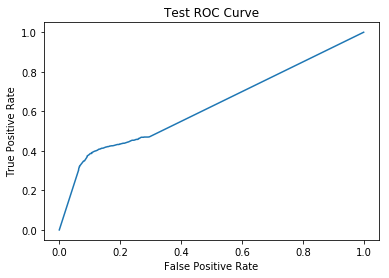

RandomForestClassifier
Test Accuracy Score: 0.8970623937848993
Test F1 Score: 0.3908045977011494
Test ROC AUC Score: 0.794820510401434
                 Predicted Negative  Predicted Positive
Actual Negative                7118                 192
Actual Positive                 656                 272


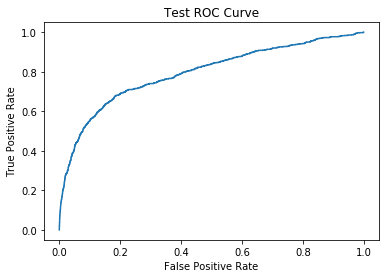

XGBClassifier
Test Accuracy Score: 0.9032532168001942
Test F1 Score: 0.39113827349121466
Test ROC AUC Score: 0.8085265667012596
                 Predicted Negative  Predicted Positive
Actual Negative                7185                 125
Actual Positive                 672                 256


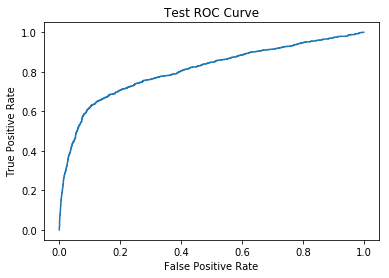

In [94]:
forest(20, 1000)

# w/Oversampling

In [86]:
from imblearn.over_sampling import RandomOverSampler

In [111]:
ros = RandomOverSampler(sampling_strategy=.2, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled = pd.DataFrame(X_resampled, columns=X_train.columns.tolist()) 
y_resampled = pd.Series(y_resampled)
X_resampled.shape, y_resampled.shape

((35085, 23), (35085,))

In [112]:
pd.Series(y_resampled).value_counts()

0    29238
1     5847
dtype: int64

DecisionTreeClassifier
Test Accuracy Score: 0.8610099538722991
Test F1 Score: 0.35420191765369424
Test ROC AUC Score: 0.6314924200433983
                 Predicted Negative  Predicted Positive
Actual Negative                6779                 531
Actual Positive                 614                 314


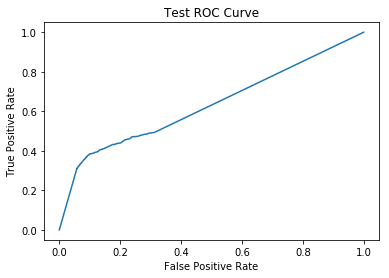

RandomForestClassifier
Test Accuracy Score: 0.8937848992473901
Test F1 Score: 0.41235728676964406
Test ROC AUC Score: 0.79425164512477
                 Predicted Negative  Predicted Positive
Actual Negative                7056                 254
Actual Positive                 621                 307


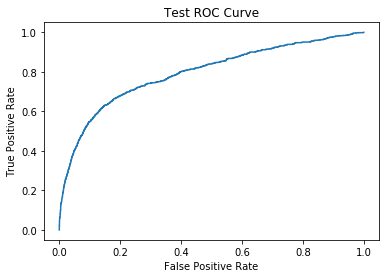

XGBClassifier
Test Accuracy Score: 0.9005826656955572
Test F1 Score: 0.4636542239685658
Test ROC AUC Score: 0.810597787631492
                 Predicted Negative  Predicted Positive
Actual Negative                7065                 245
Actual Positive                 574                 354


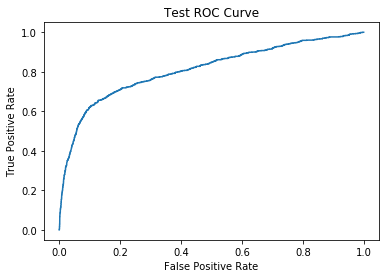

In [113]:
forest(20, 500, X_train=X_resampled, X_test=X_test, y_train=y_resampled, y_test=y_test)

## Comparision to Logistic Regression

Test Accuracy Score: 0.892571012381646
Test F1 Score: 0.4
Test ROC AUC Score: 0.7842569224963443
                 Predicted Negative  Predicted Positive
Actual Negative                7058                 252
Actual Positive                 633                 295


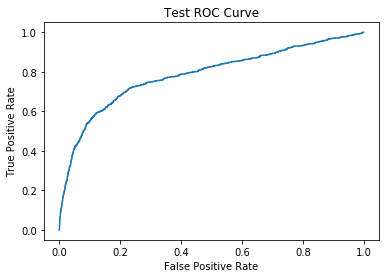

In [115]:
run_log_reg(X_resampled, X_test, y_resampled, y_test)